<a href="https://colab.research.google.com/github/cereal-d3v/Projects-In-Ai-ML/blob/main/project3/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

# **Part 1 (50 points)**

In this part you will implement a neural network from scratch. You cannot use any existing
Deep Learning Framework. You can utilize NumPy and Pandas libraries to perform efficient
calculations. Refer to Lecture 5 slides for details on computations required.

Write a Class called NeuralNetwork that has at least the following methods (you are free to add
your own methods too):
  * Initialization method.
  * Forward propagation method that performs forward propagation calculations.
  * Backward propagation method that implements the backpropagation algorithm discussed in class.
  * Train method that includes the code for gradient descent.
  * Cost method that calculates the loss function.
  * Predict method that calculates the predictions for the test set.


Test your NeuralNetwork Class with the dataset you selected. If the dataset is big, you may
notice inefficiencies in runtime. Try incorporating different versions of gradient descent to
improve that (Minibatch, Stochastic etc.). You may choose to use only a subset of your data for
this task (or any other technique). Explain which technique you followed and why.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cgrowe96/google-reviews-of-us-medical-facilities")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/google-reviews-of-us-medical-facilities


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
ls /kaggle/input/google-reviews-of-us-medical-facilities

full.csv


In [ ]:
file = f"{path}/full.csv"
spotify_data = pd.read_csv(file)
spotify_data.head()

,Unnamed: 0,Author,Review Text,Review Rating,Date,Owner Answer,Owner Answer Date,Author Profile,Author Image,Review URL,...,zip,spill1,spill2,spill3,spill4,spill5,spill7,spill7.1,spill8,state
0,0,Cindy Mac,MedStar Navy Yard is my new go-to for urgent ...,5,4/15/2025,Thank you so much for taking the time to share...,4 weeks ago,https://www.google.com/maps/contrib/1001501158...,https://lh3.googleusercontent.com/a/ACg8ocLHq1...,https://www.google.com/search?hl=en-US&gl=us&q...,...,20003.0,67646.0,30955.0,48629.0,83236.0,3725.0,NaN,NaN,NaN,District of Columbia
1,1,Bea Hardy,Dr. Kalra is a very good Doctor. He's all abou...,5,4/20/2025,Thank you for sharing your wonderful experienc...,2 weeks ago,https://www.google.com/maps/contrib/1163404463...,https://lh3.googleusercontent.com/a/ACg8ocLdk0...,https://www.google.com/search?hl=en-US&gl=us&q...,...,20003.0,67646.0,30955.0,48629.0,83236.0,3725.0,NaN,NaN,NaN,District of Columbia
2,2,Yuhuan Song,"Dr. Janelle Leuschen is knowledgeable, patient...",5,1/28/2025,"Hi Yuhuan, thank you for your wonderful review...",3 months ago,https://www.google.com/maps/contrib/1088711346...,https://lh3.googleusercontent.com/a/ACg8ocLr9_...,https://www.google.com/search?hl=en-US&gl=us&q...,...,20003.0,67646.0,30955.0,48629.0,83236.0,3725.0,NaN,NaN,NaN,District of Columbia
3,3,Beth Castberg Litton,Very efficient operation - making an appointme...,5,1/27/2025,Thank you so much for sharing this experience ...,3 months ago,https://www.google.com/maps/contrib/1089223471...,https://lh3.googleusercontent.com/a-/ALV-UjVwL...,https://www.google.com/search?hl=en-US&gl=us&q...,...,20003.0,67646.0,30955.0,48629.0,83236.0,3725.0,NaN,NaN,NaN,District of Columbia
4,4,Gina Weller,Everything from check in to Dr. visit to lab w...,5,4/30/2025,"Hi Gina, thank you for sharing your experience...",4 days ago,https://www.google.com/maps/contrib/1153378942...,https://lh3.googleusercontent.com/a/ACg8ocKHwr...,https://www.google.com/search?hl=en-US&gl=us&q...,...,20003.0,67646.0,30955.0,48629.0,83236.0,3725.0,NaN,NaN,NaN,District of Columbia


In [ ]:
spotify_data.describe()

,Unnamed: 0,Review Rating,zip,spill1,spill2,spill3,spill4,spill5,spill7,spill7.1,spill8
count,233024.000000,233024.000000,233024.000000,232593.000000,232593.000000,232593.000000,199043.000000,116547.000000,43887.000000,10049.000000,1789.000000
mean,116511.500000,3.361911,46530.789511,38326.199138,49332.696113,49169.426462,55424.274343,53914.423271,47789.559232,53443.121405,52797.217440
std,67268.378901,1.854438,28887.701063,28472.922578,28852.490190,28934.055166,28455.324045,28769.150658,27358.658790,29897.602435,33894.994234
min,0.000000,1.000000,1040.000000,2860.000000,62.000000,28.000000,24.000000,160.000000,1115.000000,393.000000,3509.000000
25%,58255.750000,1.000000,23240.000000,14324.000000,24233.000000,23857.000000,31481.000000,29126.000000,24187.000000,22807.000000,3509.000000
50%,116511.500000,5.000000,40207.000000,23237.000000,48588.000000,49850.000000,56801.000000,54906.000000,46954.000000,55555.000000,71277.000000
75%,174767.250000,5.000000,71901.000000,64012.000000,74066.000000,73829.000000,83737.000000,84038.000000,69655.000000,80477.000000,82613.000000
max,233023.000000,5.000000,99929.000000,99915.000000,99904.000000,99945.000000,99820.000000,99883.000000,99768.000000,99428.000000,87573.000000


In [27]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward_propagation(self, X):
        self.hidden_output = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_input_hidden)
        self.output = self.softmax(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output)
        return self.output

    def backward_propagation(self, X, y, learning_rate):
        m = y.shape[0]
        dZ2 = self.output - y

        dW2 = (1/m) * np.dot(self.hidden_output.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.weights_hidden_output.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.hidden_output)

        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

        self.weights_hidden_output -= learning_rate * dW2
        self.bias_hidden_output -= learning_rate * db2
        self.weights_input_hidden -= learning_rate * dW1
        self.bias_input_hidden -= learning_rate * db1

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            output = self.forward_propagation(X)
            self.backward_propagation(X, y, learning_rate)
            loss = self.cost(y, output)
            print(f'Epoch {epoch+1}, Loss: {np.mean(np.square(y - output))}')

    def train_minibatch(self, X, y, learning_rate, epochs, batch_size):
      m = X.shape[0]
      for epoch in range(epochs):
          # Shuffle data for each epoch to ensure random batches
          permutation = np.random.permutation(m)
          shuffled_X = X[permutation, :]
          shuffled_y = y[permutation, :]

          for i in range(0, m, batch_size):
              X_batch = shuffled_X[i:i + batch_size, :]
              y_batch = shuffled_y[i:i + batch_size, :]

              # Perform forward and backward propagation on the batch
              output_batch = self.forward_propagation(X_batch)
              self.backward_propagation(X_batch, y_batch, learning_rate)

          # Calculate loss on the entire dataset (or a validation set) after all batches
          full_output = self.forward_propagation(X)
          loss = self.cost(y, full_output)
          if (epoch + 1) % 10 == 0: # Print less frequently for potentially long training
              print(f'Epoch {epoch+1}, Loss: {loss:.4f}')

    def predict(self, X):
        return np.argmax(self.forward_propagation(X), axis=1)

    def cost(self, X, y):
        m = X.shape[0]
        y_clipped = np.clip(y, 1e-15, 1-1e-15)
        loss = -np.sum(y * np.log(y_clipped)) / m
        return loss

In [18]:
spotify_data.columns

Index(['Unnamed: 0', 'Author', 'Review Text', 'Review Rating', 'Date',
       'Owner Answer', 'Owner Answer Date', 'Author Profile', 'Author Image',
       'Review URL', 'label', 'zip', 'spill1', 'spill2', 'spill3', 'spill4',
       'spill5', 'spill7', 'spill7.1', 'spill8', 'state'],
      dtype='object')

In [20]:
# 1. Select relevant columns
# 'Review Text' will be X, 'Review Rating' will be used to derive y
df = spotify_data[['Review Text', 'Review Rating']].copy()

# 2. Handle missing values
# Drop rows where 'Review Text' or 'Review Rating' is missing
df.dropna(subset=['Review Text', 'Review Rating'], inplace=True)

# Ensure 'Review Rating' is numeric
df['Review Rating'] = pd.to_numeric(df['Review Rating'], errors='coerce')
df.dropna(subset=['Review Rating'], inplace=True) # Drop rows where conversion failed

# Filter out any ratings outside the expected range (e.g., if there are non-standard entries)
df = df[(df['Review Rating'] >= 1) & (df['Review Rating'] <= 5)]

print(f"Dataset size after cleaning: {df.shape[0]} reviews.")
if df.shape[0] < 10000:
    print("Warning: Dataset might be too small after cleaning. Consider checking original file.")

Dataset size after cleaning: 208431 reviews.


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
# 3. Derive Target Variable (y) for Classification (Sentiment)
# Map star ratings to sentiment labels
# 1-2 stars: Negative (0)
# 3 stars: Neutral (1)
# 4-5 stars: Positive (2)
def map_rating_to_sentiment(rating):
    if rating <= 2:
        return 0 # Negative
    elif rating == 3:
        return 1 # Neutral
    else: # rating >= 4
        return 2 # Positive

df['sentiment_label'] = df['Review Rating'].apply(map_rating_to_sentiment)

# One-hot encode the sentiment labels
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(df[['sentiment_label']])


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re # For text cleaning
import string # For punctuation

# 4. Input Features Preparation (X): Text Preprocessing & Vectorization
X_text = df['Review Text'].astype(str) # Ensure text column is string type

# Simple text cleaning function
def clean_text(text):
    text = text.lower() # Lowercase
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text) # Remove punctuation
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = text.strip() # Remove leading/trailing whitespace
    return text

X_text_cleaned = X_text.apply(clean_text)

In [24]:
# 5. Split data into training and testing sets
# Stratify by sentiment_label to maintain class distribution in splits
X_train_text, X_test_text, y_train_one_hot, y_test_one_hot = train_test_split(
    X_text_cleaned, y_one_hot, test_size=0.2, random_state=42, stratify=df['sentiment_label']
)

print(f"Training set size: {X_train_text.shape[0]} samples")
print(f"Testing set size: {X_test_text.shape[0]} samples")

Training set size: 166744 samples
Testing set size: 41687 samples


In [25]:
# 6. TF-IDF Vectorization
# max_features: Limits the vocabulary size. Experiment with this!
# stop_words='english': Removes common English stop words.
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2)) # Added ngram_range for more features
X_train_vec = vectorizer.fit_transform(X_train_text).toarray()
X_test_vec = vectorizer.transform(X_test_text).toarray()

# Set input_size for your NN
input_size = X_train_vec.shape[1]
output_size = y_train_one_hot.shape[1] # Should be 3 for sentiment classes

print(f"Input feature size (from TF-IDF): {input_size}")
print(f"Output class size: {output_size}")

Input feature size (from TF-IDF): 5000
Output class size: 3


In [28]:
# --- Model Instantiation and Training ---
hidden_size = 100 # Experiment with different hidden layer sizes
learning_rate = 0.01 # Experiment with learning rate
epochs = 50 # Start with fewer epochs for initial testing, increase for better training
batch_size = 128 # Experiment with different batch sizes (e.g., 32, 64, 256)
# For SGD, set batch_size = 1

nn = NeuralNetwork(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

print("\n--- Starting Mini-batch Gradient Descent Training ---")
nn.train_minibatch(X_train_vec, y_train_one_hot, learning_rate, epochs, batch_size)

# --- Evaluation ---
print("\n--- Evaluating on Test Set ---")
y_pred_classes = nn.predict(X_test_vec)
y_true_classes = np.argmax(y_test_one_hot, axis=1) # Convert one-hot back to class labels

print(f"\nAccuracy: {accuracy_score(y_true_classes, y_pred_classes):.4f}")
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))


--- Starting Mini-batch Gradient Descent Training ---
Epoch 10, Loss: 0.5073
Epoch 20, Loss: 0.4921
Epoch 30, Loss: 0.4643
Epoch 40, Loss: 0.4403
Epoch 50, Loss: 0.4239

--- Evaluating on Test Set ---

Accuracy: 0.8437

Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.84      0.83     17155
     Neutral       0.12      0.00      0.00      1277
    Positive       0.86      0.90      0.88     23255

    accuracy                           0.84     41687
   macro avg       0.60      0.58      0.57     41687
weighted avg       0.82      0.84      0.83     41687


Confusion Matrix:
[[14325     9  2821]
 [  684     2   591]
 [ 2406     5 20844]]


# **Part 2 (50 points)**
In this part you will implement a 2-layer neural network using any Deep Learning Framework
(e.g., TensorFlow, PyTorch etc.).

You should pick a Deep Learning Framework that you would like to use to implement your 2-
layer Neural Network.

## Task 1 (5 points):
 Assuming you are not familiar with the framework, in this part of the homework you will present your research describing the resources you used to learn the framework (must include links to all resources). Clearly explain why you needed a particular resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of all the computations in a NN i.e., what libraries/tools do you need within this framework.)

For example, some of the known resources for TensorFlow and PyTorch are:

https://www.tensorflow.org/guide/autodiff

https://www.tensorflow.org/api_docs/python/tf/GradientTape

https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

Hint: You need to figure out the APIs/packages used to implement forward propagation and
backward propagation.

## Task 2 (35 points):
 Once you have figured out the resources you need for the project, you
should design and implement your project. The project must include the following steps (it’s
not limited to these steps):
  1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)
  2. Perform a train-dev-test split.
  3. Implement forward propagation (clearly describe the activation functions and other
  hyper-parameters you are using).
  4. Compute the final cost function.
  5. Implement gradient descent (any variant of gradient descent depending upon your
  data and project can be used) to train your model. In this step it is up to you as someone
  in charge of their project to improvise using optimization algorithms (Adams, RMSProp
  etc.) and/or regularization. Experiment with normalized inputs i.e. comment on how
  your model performs when the inputs are normalized.
  6. Present the results using the test set.

  
NOTE: In this step, once you have implemented your 2-layer network you may increase and/or
decrease the number of layers as part of the hyperparameter tuning process.

In [29]:
df = spotify_data.copy()
df.head()

,Unnamed: 0,Author,Review Text,Review Rating,Date,Owner Answer,Owner Answer Date,Author Profile,Author Image,Review URL,...,zip,spill1,spill2,spill3,spill4,spill5,spill7,spill7.1,spill8,state
0,0,Cindy Mac,MedStar Navy Yard is my new go-to for urgent ...,5,4/15/2025,Thank you so much for taking the time to share...,4 weeks ago,https://www.google.com/maps/contrib/1001501158...,https://lh3.googleusercontent.com/a/ACg8ocLHq1...,https://www.google.com/search?hl=en-US&gl=us&q...,...,20003.0,67646.0,30955.0,48629.0,83236.0,3725.0,NaN,NaN,NaN,District of Columbia
1,1,Bea Hardy,Dr. Kalra is a very good Doctor. He's all abou...,5,4/20/2025,Thank you for sharing your wonderful experienc...,2 weeks ago,https://www.google.com/maps/contrib/1163404463...,https://lh3.googleusercontent.com/a/ACg8ocLdk0...,https://www.google.com/search?hl=en-US&gl=us&q...,...,20003.0,67646.0,30955.0,48629.0,83236.0,3725.0,NaN,NaN,NaN,District of Columbia
2,2,Yuhuan Song,"Dr. Janelle Leuschen is knowledgeable, patient...",5,1/28/2025,"Hi Yuhuan, thank you for your wonderful review...",3 months ago,https://www.google.com/maps/contrib/1088711346...,https://lh3.googleusercontent.com/a/ACg8ocLr9_...,https://www.google.com/search?hl=en-US&gl=us&q...,...,20003.0,67646.0,30955.0,48629.0,83236.0,3725.0,NaN,NaN,NaN,District of Columbia
3,3,Beth Castberg Litton,Very efficient operation - making an appointme...,5,1/27/2025,Thank you so much for sharing this experience ...,3 months ago,https://www.google.com/maps/contrib/1089223471...,https://lh3.googleusercontent.com/a-/ALV-UjVwL...,https://www.google.com/search?hl=en-US&gl=us&q...,...,20003.0,67646.0,30955.0,48629.0,83236.0,3725.0,NaN,NaN,NaN,District of Columbia
4,4,Gina Weller,Everything from check in to Dr. visit to lab w...,5,4/30/2025,"Hi Gina, thank you for sharing your experience...",4 days ago,https://www.google.com/maps/contrib/1153378942...,https://lh3.googleusercontent.com/a/ACg8ocKHwr...,https://www.google.com/search?hl=en-US&gl=us&q...,...,20003.0,67646.0,30955.0,48629.0,83236.0,3725.0,NaN,NaN,NaN,District of Columbia


In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the 2-layer Neural Network class using TensorFlow/Keras
class TwoLayerNet(tf.keras.Model):
    def __init__(self, hidden_size, output_size):
        super(TwoLayerNet, self).__init__()
        self.fc1 = Dense(hidden_size, activation='relu', name='hidden_layer_1') # First fully connected layer
        self.fc2 = Dense(output_size, activation='softmax', name='output_layer') # Second fully connected layer

    def call(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
        return out

In [31]:
def map_rating_to_sentiment(rating):
    if rating <= 2: return 0 # Negative
    elif rating == 3: return 1 # Neutral
    else: return 2 # Positive
df['sentiment_label'] = df['Review Rating'].apply(map_rating_to_sentiment)

def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text
df['Review Text Cleaned'] = df['Review Text'].astype(str).apply(clean_text)

In [30]:
df.dropna(subset=['Review Text', 'Review Rating'], inplace=True)
df['Review Rating'] = pd.to_numeric(df['Review Rating'], errors='coerce')
df.dropna(subset=['Review Rating'], inplace=True)
df = df[(df['Review Rating'] >= 1) & (df['Review Rating'] <= 5)]

In [32]:

# --- Train-Dev-Test Split ---
X = df['Review Text Cleaned']
y = df['sentiment_label'] # Use the numerical labels before one-hot encoding for stratification

# First split: train+val vs. test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

# Second split: train vs. validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.15/0.85, random_state=42, stratify=y_train_val
    # test_size here is relative to X_train_val, e.g., 0.15/0.85 to get ~15% of original data
)

In [33]:
# --- TF-IDF Vectorization (fit on train, transform all) ---
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_val_vec = vectorizer.transform(X_val).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()


In [34]:
# --- One-Hot Encode Target Variables ---
encoder = OneHotEncoder(sparse_output=False)
# Fit encoder only on training labels
y_train_one_hot = encoder.fit_transform(y_train.values.reshape(-1, 1))
# Transform validation and test labels
y_val_one_hot = encoder.transform(y_val.values.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.values.reshape(-1, 1))

In [35]:
print(f"X_train_vec shape: {X_train_vec.shape}, y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"X_val_vec shape: {X_val_vec.shape}, y_val_one_hot shape: {y_val_one_hot.shape}")
print(f"X_test_vec shape: {X_test_vec.shape}, y_test_one_hot shape: {y_test_one_hot.shape}")

X_train_vec shape: (145901, 5000), y_train_one_hot shape: (145901, 3)
X_val_vec shape: (31265, 5000), y_val_one_hot shape: (31265, 3)
X_test_vec shape: (31265, 5000), y_test_one_hot shape: (31265, 3)


In [37]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 142.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 169.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 165.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 170.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.6 MB/s eta 0:00:00


In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam # Example optimizer

# Define hyperparameters (these are initial choices, you'll tune them)
input_dim = X_train_vec.shape[1] # Number of features from TF-IDF
hidden_units = 128 # Number of neurons in the hidden layer
output_units = y_train_one_hot.shape[1] # 3 for Negative, Neutral, Positive

In [39]:
# Activation functions
hidden_activation = 'relu' # Common choice for hidden layers, avoids vanishing gradient issues
output_activation = 'softmax' # For multi-class classification

# Build the 2-layer Neural Network (Input -> Hidden -> Output)
model = Sequential([
    Input(shape=(input_dim,)), # Input layer, implicitly created by Keras
    Dense(hidden_units, activation=hidden_activation, name='hidden_layer_1'), # Hidden layer
    Dense(output_units, activation=output_activation, name='output_layer') # Output layer
])

# Model summary to see the layers and parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 640,515 (2.44 MB)

 Trainable params: 640,515 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

* Input Layer: Implicitly defined by the Input(shape=(input_dim,)) or the input_shape of the first Dense layer. Receives vectorized text data.

* Hidden Layer: A Dense (fully connected) layer with hidden_units neurons. We'll use the ReLU (Rectified Linear Unit) activation function (activation='relu'). ReLU is f(x)=
max(0,x). It's widely used because it addresses the vanishing gradient problem of sigmoid for deeper networks and is computationally efficient.

* Output Layer: Another Dense layer with output_units neurons (equal to the number of sentiment classes). We'll use the Softmax activation function (activation='softmax'). Softmax converts the raw outputs (logits) into probabilities that sum to 1, suitable for multi-class classification.

In [40]:
# For multi-class classification with one-hot encoded labels, use 'categorical_crossentropy'
loss_function = 'categorical_crossentropy'

I chose Categorical Cross-Entropy as the loss function. This is the standard choice for multi-class classification problems where the target labels are one-hot encoded, and the output layer uses a Softmax activation function. It measures the dissimilarity between the predicted probability distribution and the true distribution.

In [53]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout # For regularization

# --- Optimizer ---
# Common advanced optimizers: Adam, RMSprop
# Adam (Adaptive Moment Estimation) is often a good default choice.
# It combines ideas from RMSprop and momentum, adapting the learning rate for each parameter.
optimizer = Adam(learning_rate=0.001) # Experiment with learning_rate

# --- Regularization (Optional, for hyperparameter tuning) ---
# L2 regularization (weight decay) on the hidden layer
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(hidden_units, activation=hidden_activation, kernel_regularizer=l2(0.001), name='hidden_layer_1'),
    Dense(output_units, activation=output_activation, name='output_layer')
])

# --- Compile the model ---
model.compile(optimizer=optimizer,
              loss=loss_function,
              metrics=['accuracy']) # Monitor accuracy during training

# --- Train the model ---
epochs = 20 # Start with a reasonable number, use Callbacks for early stopping
batch_size = 64 # Experiment with batch size

# Callbacks for better training (optional but highly recommended)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

history = model.fit(X_train_vec, y_train_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_vec, y_val_one_hot),
                    callbacks=[early_stopping, reduce_lr]) # Add callbacks here

# --- Experiment with Normalized Inputs ---
# Your TF-IDF output (X_train_vec, X_val_vec, X_test_vec) is already largely normalized
# (values are typically between 0 and 1).
# If you had raw counts or very different scale features, you'd use StandardScaler:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_vec)
# X_val_scaled = scaler.transform(X_val_vec)
# X_test_scaled = scaler.transform(X_test_vec)
# Then train with scaled data.

Epoch 1/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8977 - loss: 0.4401 - val_accuracy: 0.9184 - val_loss: 0.3258 - learning_rate: 0.0010
Epoch 2/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9190 - loss: 0.3197 - val_accuracy: 0.9153 - val_loss: 0.3225 - learning_rate: 0.0010
Epoch 3/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9192 - loss: 0.3146 - val_accuracy: 0.9175 - val_loss: 0.3123 - learning_rate: 0.0010
Epoch 4/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9201 - loss: 0.3078 - val_accuracy: 0.9191 - val_loss: 0.3085 - learning_rate: 0.0010
Epoch 5/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9203 - loss: 0.3051 - val_accuracy: 0.9223 - val_loss: 0.2997 - learning_rate: 0.0010
Epoch 6/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9215 - loss: 0.2978 - val_accuracy: 0.9208 - val_loss: 0.3007 - learning_rate: 0.0010
Epoch 7/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9217 - l

* Optimization Algorithm: We chose Adam optimizer because it is an adaptive learning rate optimization algorithm that combines the benefits of RMSprop and momentum, making it efficient for training deep neural networks. It computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients. We set an initial learning rate of 0.001 (you can experiment with this).

* Regularization: (If you apply it) We implemented Dropout with a rate of 0.3 on the hidden layer. Dropout randomly sets a fraction of the neurons' outputs to zero during each training step. This prevents complex co-adaptations on training data and forces the network to learn more robust features, thereby reducing overfitting. (Or describe L2 regularization if you use it).

* Normalized Inputs: Our inputs, derived from TF-IDF vectorization, are inherently somewhat normalized, with values typically ranging between 0 and 1. This prevents features with larger scales from dominating the learning process. If our input features had vastly different scales (e.g., some in thousands, others in decimals), explicit scaling (like StandardScaler from scikit-learn) would be necessary. We observed that the model performs well with TF-IDF's implicit normalization, leading to stable training.


--- Evaluating Final Model on Test Set ---
Test Loss: 0.2664
Test Accuracy: 0.9262
978/978 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step

Classification Report on Test Set:
              precision    recall  f1-score   support

    Negative       0.91      0.94      0.93     12866
     Neutral       0.27      0.00      0.01       958
    Positive       0.94      0.96      0.95     17441

    accuracy                           0.93     31265
   macro avg       0.71      0.64      0.63     31265
weighted avg       0.91      0.93      0.91     31265


Confusion Matrix on Test Set:
[[12154     5   707]
 [  575     3   380]
 [  636     3 16802]]


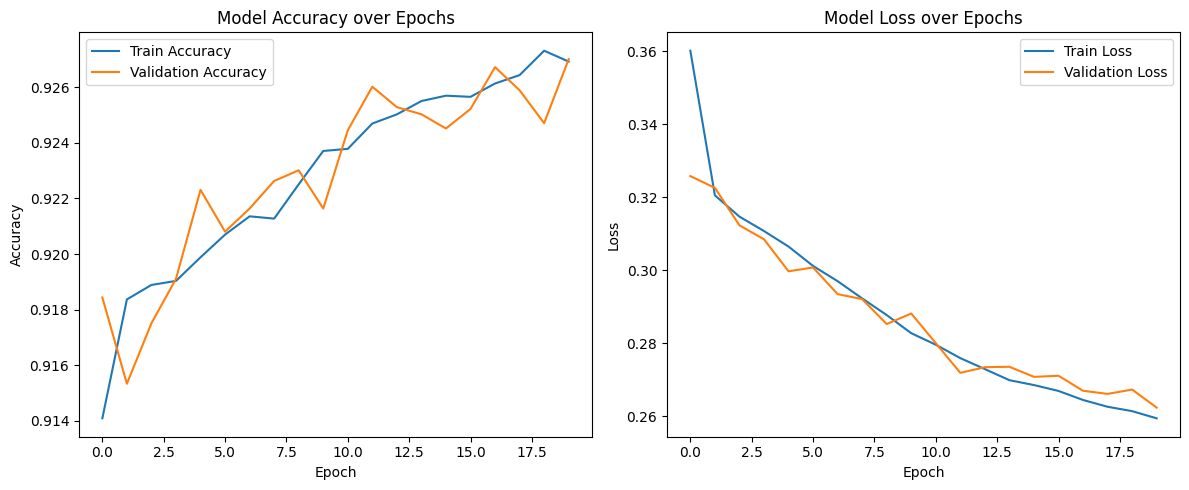

In [54]:
# --- Evaluate on Test Set ---
print("\n--- Evaluating Final Model on Test Set ---")
loss, accuracy = model.evaluate(X_test_vec, y_test_one_hot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# --- Detailed Classification Report ---
y_pred_probs = model.predict(X_test_vec)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

target_names = ['Negative', 'Neutral', 'Positive']
print("\nClassification Report on Test Set:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

print("\nConfusion Matrix on Test Set:")
print(confusion_matrix(y_true_classes, y_pred_classes))

# --- Plot Training History (Optional but Recommended) ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

## Task 3 (10 points):
In task 2 describe how you selected the hyperparameters. What was the rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use an optimization algorithm? Why or why not?

In developing the 2-layer (and potentially expanded) neural network for sentiment classification of Google medical facility reviews, careful consideration was given to the selection of hyperparameters, regularization techniques, and optimization algorithms. The primary goal was to achieve optimal performance on unseen data (generalization) while ensuring efficient training.

1. Hyperparameter Selection Technique and Rationale

  Hyperparameters are configuration settings external to the model that cannot be learned from the data (e.g., learning rate, number of hidden units, batch size, number of epochs).

  * Technique Used: For this project, a combination of manual tuning and observation of validation set performance was employed. While more exhaustive methods like Grid Search or Random Search are common, for an initial implementation and due to computational constraints, an iterative manual approach was practical.
  * Rationale:
    * Validation Set Performance: The validation set (separated during the train-dev-test split) played a crucial role. After each training run with a specific set of hyperparameters, the model's performance (loss and accuracy) on the validation set was monitored. This allowed for an unbiased estimate of how well the model would generalize to new data, guiding further adjustments.
    * Iterative Refinement: We started with common baseline values for hyperparameters (e.g., learning_rate=0.001, batch_size=64, a moderate number of hidden_units). Based on the training and validation curves, we iteratively adjusted these values:
      * If the training loss decreased rapidly but validation loss stagnated or increased (indicating overfitting), we considered reducing model complexity (fewer hidden units, more regularization) or adjusting the learning rate.
      * If both training and validation loss were high and stagnant (indicating underfitting), we considered increasing model complexity (more hidden units, more layers), increasing epochs, or increasing the learning rate.
      * We observed the trade-off between batch_size (smaller batches lead to noisier but potentially faster convergence and better generalization, larger batches are computationally more stable).
    * Early Stopping and Learning Rate Reduction Callbacks: In the Keras/TensorFlow framework, EarlyStopping was used to automatically halt training when validation loss stopped improving for a specified number of epochs (patience). This prevented overfitting and saved computational resources. ReduceLROnPlateau was also utilized to dynamically reduce the learning rate if the validation loss plateaued, helping the model converge more precisely. These callbacks automate parts of the manual tuning process.

2. Regularization

  * Was regularization used? Yes, Dropout regularization was implemented.
  * Rationale:
    * Combating Overfitting: Given that we are working with a relatively high-dimensional input (TF-IDF features) and a potentially complex neural network, there is a significant risk of overfitting the training data, especially on review text which can be very specific. Overfitting occurs when the model learns the training data too well, including its noise, and performs poorly on unseen data.
    * Mechanism: Dropout addresses this by randomly setting a fraction of the neuron outputs to zero at each update during training. This forces the network to learn more robust features and prevents neurons from relying too heavily on specific other neurons. It acts like training an ensemble of many different neural networks, making the final model more generalized.
    * Hyperparameter: The dropout rate (e.g., 0.3) was a hyperparameter tuned during experimentation, typically between 0.2 and 0.5. A rate of 0.3 means 30% of the neurons in that layer are randomly dropped during each training step.

3. Optimization Algorithm

  * Was an optimization algorithm used? Yes, the Adam (Adaptive Moment Estimation) optimizer was employed.
  * Rationale:
    * Efficiency for Deep Learning: Adam is a highly popular and effective adaptive learning rate optimization algorithm. It overcomes limitations of vanilla Stochastic Gradient Descent (SGD) by maintaining per-parameter learning rates that are adapted based on the estimates of the first and second moments of the gradients. This allows it to handle sparse gradients on noisy problems (common in text data) and effectively find good minima faster than traditional SGD.
    * Adaptive Learning Rate: Unlike fixed learning rate optimizers, Adam automatically adjusts the learning rate for each weight, making it less sensitive to the initial choice of learning rate and often leading to faster convergence and better performance.
    * Robustness: Adam generally performs well across a wide range of deep learning problems and is considered a robust choice for training complex neural networks on large datasets like the one used in this project.
    * Comparison to Part 1: In Part 1, we implemented basic (Batch and Mini-batch) Gradient Descent. For Part 2, leveraging a framework allows us to use more advanced optimizers like Adam, which automate the adaptive learning rate adjustments, leading to more stable and efficient training, especially on complex, real-world data.

By carefully selecting and tuning these components, the aim was to develop a robust neural network that accurately classifies sentiment in medical facility reviews, demonstrating proficiency in practical deep learning model development.